In [20]:
import numpy as np
import pandas as pd

import torch
from PriceFNN import PriceFNN
from sklearn.preprocessing import MinMaxScaler

from shapflow.flow import CausalLinks
from shapflow.flow import build_feature_graph
from shapflow.flow import GraphExplainer
from shapflow.flow import edge_credits2edge_credit
from shapflow.flow import translator

from shap_flow_util import read_csv_incl_timeindex
from shap_flow_util import create_pytorch_lightning_f

import time
import dill
import tqdm
import multiprocess as mp

learning dependency for carbon_price:   0%|          | 0/14 [00:00<?, ?it/s]

[0]	test-rmse:26.11866
[100]	test-rmse:25.42830
[200]	test-rmse:24.94262
[300]	test-rmse:24.58149
[400]	test-rmse:24.27639
[499]	test-rmse:23.98335


learning dependency for gas_price:   7%|▋         | 1/14 [00:00<00:09,  1.37it/s]   

[0]	test-rmse:109.96276
[100]	test-rmse:103.24946
[200]	test-rmse:98.36776
[300]	test-rmse:94.60547
[400]	test-rmse:91.53200
[499]	test-rmse:89.27075


learning dependency for oil_price:  14%|█▍        | 2/14 [00:01<00:08,  1.40it/s]

[0]	test-rmse:17.76278
[100]	test-rmse:17.31558
[200]	test-rmse:16.92905
[300]	test-rmse:16.56775
[400]	test-rmse:16.23895
[499]	test-rmse:15.95235


learning dependency for solar_da:  21%|██▏       | 3/14 [00:02<00:08,  1.33it/s] 

[0]	test-rmse:1595.86382
[100]	test-rmse:1357.95093
[200]	test-rmse:1168.84247
[300]	test-rmse:1019.16730
[400]	test-rmse:902.90226
[499]	test-rmse:813.91111


learning dependency for wind_da:  29%|██▊       | 4/14 [00:02<00:06,  1.43it/s] 

[0]	test-rmse:2380.34220
[100]	test-rmse:2255.12393
[200]	test-rmse:2161.66033
[300]	test-rmse:2089.20260
[400]	test-rmse:2031.59346
[499]	test-rmse:1985.17879


learning dependency for generation_da:  36%|███▌      | 5/14 [00:03<00:05,  1.53it/s]

[0]	test-rmse:10709.27188
[100]	test-rmse:9316.21057
[200]	test-rmse:8225.19777
[300]	test-rmse:7364.72907
[400]	test-rmse:6685.83328
[499]	test-rmse:6155.01687


learning dependency for temp_mean:  43%|████▎     | 6/14 [00:03<00:04,  1.62it/s]    

[0]	test-rmse:6.78274
[100]	test-rmse:5.87547
[200]	test-rmse:5.16506
[300]	test-rmse:4.59461
[400]	test-rmse:4.14373
[499]	test-rmse:3.79160


learning dependency for temp_mean_7d_avg:  50%|█████     | 7/14 [00:04<00:04,  1.57it/s]

[0]	test-rmse:6.01790
[100]	test-rmse:5.04511
[200]	test-rmse:4.26836
[300]	test-rmse:3.65139
[400]	test-rmse:3.15141
[499]	test-rmse:2.75917


learning dependency for solar_da_ramp:  57%|█████▋    | 8/14 [00:05<00:03,  1.53it/s]   

[0]	test-rmse:496.20893
[100]	test-rmse:433.56749
[200]	test-rmse:384.30113
[300]	test-rmse:345.34783
[400]	test-rmse:314.68679
[499]	test-rmse:291.41297


learning dependency for wind_da_ramp:  64%|██████▍   | 9/14 [00:06<00:03,  1.33it/s] 

[0]	test-rmse:239.02784
[100]	test-rmse:237.65450
[200]	test-rmse:236.68032
[300]	test-rmse:235.96750
[400]	test-rmse:235.43837
[499]	test-rmse:235.03673


learning dependency for load_da_ramp:  71%|███████▏  | 10/14 [00:07<00:03,  1.22it/s]

[0]	test-rmse:2472.66025
[100]	test-rmse:2277.81626
[200]	test-rmse:2122.50541
[300]	test-rmse:2003.20224
[400]	test-rmse:1910.60417
[499]	test-rmse:1838.82343


learning dependency for generation_da_ramp:  79%|███████▊  | 11/14 [00:08<00:02,  1.11it/s]

[0]	test-rmse:1722.93577
[100]	test-rmse:1562.07071
[200]	test-rmse:1436.00675
[300]	test-rmse:1339.80895
[400]	test-rmse:1265.61013
[499]	test-rmse:1207.43661


learning dependency for nuclear_avail:  86%|████████▌ | 12/14 [00:09<00:01,  1.19it/s]     

[0]	test-rmse:5768.50909
[100]	test-rmse:5082.52792
[200]	test-rmse:4557.63473
[300]	test-rmse:4158.12052
[400]	test-rmse:3852.29677
[499]	test-rmse:3616.31346


learning dependency for load_da:  93%|█████████▎| 13/14 [00:09<00:00,  1.22it/s]      

[0]	test-rmse:12417.00694
[100]	test-rmse:10740.96994
[200]	test-rmse:9407.14301
[300]	test-rmse:8344.83497
[400]	test-rmse:7459.43408
[499]	test-rmse:6746.04164


learning dependency for load_da: 100%|██████████| 14/14 [00:10<00:00,  1.31it/s]


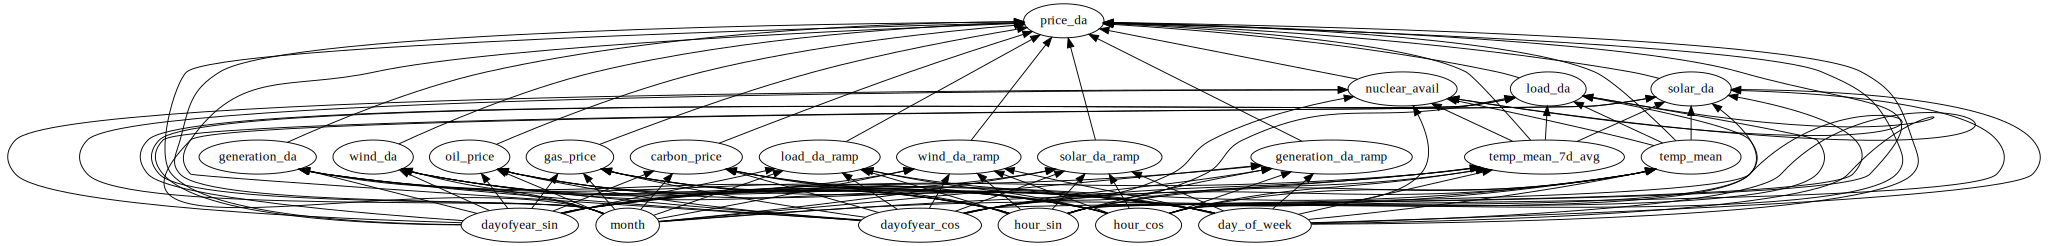

100%|██████████| 100/100 [3:52:42<00:00, 139.62s/it] 


17701.779586076736


bruteforce sampling: 100%|██████████| 500/500 [05:46<00:00,  1.44it/s]


finished shap-flow calculation for model #0


learning dependency for temp_mean_7d_avg:   0%|          | 0/14 [00:00<?, ?it/s]

[0]	test-rmse:6.32872
[100]	test-rmse:5.24566
[200]	test-rmse:4.36442
[300]	test-rmse:3.65505
[400]	test-rmse:3.08687
[499]	test-rmse:2.64084


learning dependency for solar_da_ramp:   7%|▋         | 1/14 [00:00<00:03,  3.27it/s]   

[0]	test-rmse:1084.09792
[100]	test-rmse:947.09063
[200]	test-rmse:839.07201
[300]	test-rmse:753.52714
[400]	test-rmse:685.69838
[499]	test-rmse:633.17896


learning dependency for wind_da:  14%|█▍        | 2/14 [00:00<00:03,  3.10it/s]      

[0]	test-rmse:3266.94905
[100]	test-rmse:3061.06548
[200]	test-rmse:2904.33682
[300]	test-rmse:2787.45382
[400]	test-rmse:2698.79937
[499]	test-rmse:2631.39288


learning dependency for solar_da:  21%|██▏       | 3/14 [00:00<00:03,  3.06it/s]

[0]	test-rmse:3427.01702
[100]	test-rmse:2866.92481
[200]	test-rmse:2411.52254
[300]	test-rmse:2043.71656
[400]	test-rmse:1746.65401
[499]	test-rmse:1509.99563


learning dependency for oil_price:  29%|██▊       | 4/14 [00:01<00:03,  2.98it/s]

[0]	test-rmse:22.89937
[100]	test-rmse:20.45618
[200]	test-rmse:18.58799
[300]	test-rmse:17.16778
[400]	test-rmse:16.06806
[499]	test-rmse:15.17733


learning dependency for wind_da_ramp:  36%|███▌      | 5/14 [00:01<00:03,  2.98it/s]

[0]	test-rmse:346.61319
[100]	test-rmse:341.91111
[200]	test-rmse:338.13527
[300]	test-rmse:335.50505
[400]	test-rmse:333.39625
[499]	test-rmse:331.67263


learning dependency for load_da:  43%|████▎     | 6/14 [00:02<00:02,  2.88it/s]     

[0]	test-rmse:11244.12742
[100]	test-rmse:9613.17902
[200]	test-rmse:8300.54558
[300]	test-rmse:7249.98740
[400]	test-rmse:6405.22720
[499]	test-rmse:5718.14071


learning dependency for generation_da_ramp:  50%|█████     | 7/14 [00:02<00:02,  2.57it/s]

[0]	test-rmse:1374.09851
[100]	test-rmse:1249.02517
[200]	test-rmse:1157.35728
[300]	test-rmse:1087.91596
[400]	test-rmse:1035.85104
[499]	test-rmse:995.35041


learning dependency for load_da_ramp:  57%|█████▋    | 8/14 [00:02<00:02,  2.73it/s]      

[0]	test-rmse:2121.38950
[100]	test-rmse:1947.82436
[200]	test-rmse:1812.92266
[300]	test-rmse:1705.79367
[400]	test-rmse:1620.42197
[499]	test-rmse:1550.12085


learning dependency for generation_da:  64%|██████▍   | 9/14 [00:03<00:01,  2.84it/s]

[0]	test-rmse:10353.29549
[100]	test-rmse:9059.90308
[200]	test-rmse:8033.28515
[300]	test-rmse:7214.58656
[400]	test-rmse:6556.47531
[499]	test-rmse:6034.45827


learning dependency for gas_price:  71%|███████▏  | 10/14 [00:03<00:01,  2.81it/s]    

[0]	test-rmse:468.27939
[100]	test-rmse:436.79880
[200]	test-rmse:410.25421
[300]	test-rmse:386.07920
[400]	test-rmse:363.12187
[499]	test-rmse:342.94248


learning dependency for nuclear_avail:  79%|███████▊  | 11/14 [00:03<00:01,  2.99it/s]

[0]	test-rmse:6520.13423
[100]	test-rmse:5623.93406
[200]	test-rmse:4901.70706
[300]	test-rmse:4322.19267
[400]	test-rmse:3861.62724
[499]	test-rmse:3494.32994


learning dependency for carbon_price:  86%|████████▌ | 12/14 [00:04<00:00,  2.96it/s] 

[0]	test-rmse:11.21812
[100]	test-rmse:9.95259
[200]	test-rmse:8.97789
[300]	test-rmse:8.23142
[400]	test-rmse:7.64483
[499]	test-rmse:7.19730


learning dependency for temp_mean:  93%|█████████▎| 13/14 [00:04<00:00,  2.90it/s]   

[0]	test-rmse:7.02470
[100]	test-rmse:5.97731
[200]	test-rmse:5.13872
[300]	test-rmse:4.47234
[400]	test-rmse:3.94223
[499]	test-rmse:3.52066


learning dependency for temp_mean: 100%|██████████| 14/14 [00:04<00:00,  2.90it/s]


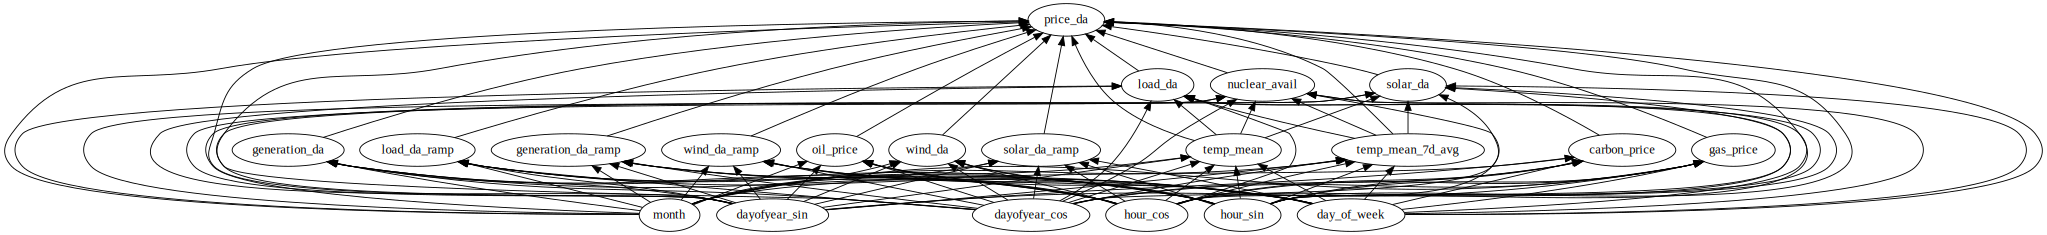

100%|██████████| 100/100 [3:37:52<00:00, 130.72s/it] 


16899.647718906403


bruteforce sampling: 100%|██████████| 500/500 [06:43<00:00,  1.24it/s]


finished shap-flow calculation for model #1


learning dependency for load_da:   0%|          | 0/14 [00:00<?, ?it/s]

[0]	test-rmse:11220.88937
[100]	test-rmse:9759.30206
[200]	test-rmse:8588.67210
[300]	test-rmse:7655.10923
[400]	test-rmse:6901.08117
[499]	test-rmse:6291.96224


learning dependency for generation_da:   7%|▋         | 1/14 [00:00<00:10,  1.24it/s]

[0]	test-rmse:10827.84434
[100]	test-rmse:9756.31257
[200]	test-rmse:8923.25493
[300]	test-rmse:8272.94536
[400]	test-rmse:7768.15643
[499]	test-rmse:7380.93231


learning dependency for temp_mean_7d_avg:  14%|█▍        | 2/14 [00:01<00:10,  1.20it/s]

[0]	test-rmse:5.62895
[100]	test-rmse:4.75247
[200]	test-rmse:4.05834
[300]	test-rmse:3.51228
[400]	test-rmse:3.08347
[499]	test-rmse:2.75614


learning dependency for load_da_ramp:  21%|██▏       | 3/14 [00:02<00:07,  1.38it/s]    

[0]	test-rmse:2344.27665
[100]	test-rmse:2158.39832
[200]	test-rmse:1999.89608
[300]	test-rmse:1881.50684
[400]	test-rmse:1787.06412
[499]	test-rmse:1713.57487


learning dependency for temp_mean:  29%|██▊       | 4/14 [00:02<00:06,  1.52it/s]   

[0]	test-rmse:6.39142
[100]	test-rmse:5.56882
[200]	test-rmse:4.92424
[300]	test-rmse:4.42131
[400]	test-rmse:4.02410
[499]	test-rmse:3.71166


learning dependency for solar_da_ramp:  36%|███▌      | 5/14 [00:03<00:05,  1.51it/s]

[0]	test-rmse:675.08155
[100]	test-rmse:597.01928
[200]	test-rmse:537.32140
[300]	test-rmse:491.47142
[400]	test-rmse:456.38332
[499]	test-rmse:430.02772


learning dependency for wind_da_ramp:  43%|████▎     | 6/14 [00:04<00:05,  1.54it/s] 

[0]	test-rmse:270.23975
[100]	test-rmse:267.91718
[200]	test-rmse:266.30496
[300]	test-rmse:265.16154
[400]	test-rmse:264.37097
[499]	test-rmse:263.76578


learning dependency for carbon_price:  50%|█████     | 7/14 [00:04<00:04,  1.61it/s]

[0]	test-rmse:38.36530
[100]	test-rmse:37.67280
[200]	test-rmse:37.06096
[300]	test-rmse:36.53098
[400]	test-rmse:36.07198
[499]	test-rmse:35.66143


learning dependency for gas_price:  57%|█████▋    | 8/14 [00:05<00:03,  1.59it/s]   

[0]	test-rmse:296.81239
[100]	test-rmse:291.96764
[200]	test-rmse:288.17949
[300]	test-rmse:285.16345
[400]	test-rmse:282.64814
[499]	test-rmse:280.38775


learning dependency for wind_da:  64%|██████▍   | 9/14 [00:05<00:03,  1.62it/s]  

[0]	test-rmse:2863.23494
[100]	test-rmse:2776.38105
[200]	test-rmse:2707.98094
[300]	test-rmse:2654.15887
[400]	test-rmse:2613.28580
[499]	test-rmse:2581.32898


learning dependency for generation_da_ramp:  71%|███████▏  | 10/14 [00:06<00:02,  1.64it/s]

[0]	test-rmse:1662.39518
[100]	test-rmse:1510.73037
[200]	test-rmse:1393.66365
[300]	test-rmse:1303.64340
[400]	test-rmse:1233.81908
[499]	test-rmse:1179.07281


learning dependency for solar_da:  79%|███████▊  | 11/14 [00:07<00:01,  1.60it/s]          

[0]	test-rmse:2202.00136
[100]	test-rmse:1910.11831
[200]	test-rmse:1682.21224
[300]	test-rmse:1507.23788
[400]	test-rmse:1372.81587
[499]	test-rmse:1270.23709


learning dependency for oil_price:  86%|████████▌ | 12/14 [00:07<00:01,  1.58it/s]

[0]	test-rmse:31.08291
[100]	test-rmse:30.52692
[200]	test-rmse:30.09210
[300]	test-rmse:29.72970
[400]	test-rmse:29.40104
[499]	test-rmse:29.11771


learning dependency for nuclear_avail:  93%|█████████▎| 13/14 [00:08<00:00,  1.59it/s]

[0]	test-rmse:7219.51987
[100]	test-rmse:6644.92766
[200]	test-rmse:6217.46662
[300]	test-rmse:5895.00295
[400]	test-rmse:5644.02378
[499]	test-rmse:5450.95124


learning dependency for nuclear_avail: 100%|██████████| 14/14 [00:09<00:00,  1.53it/s]


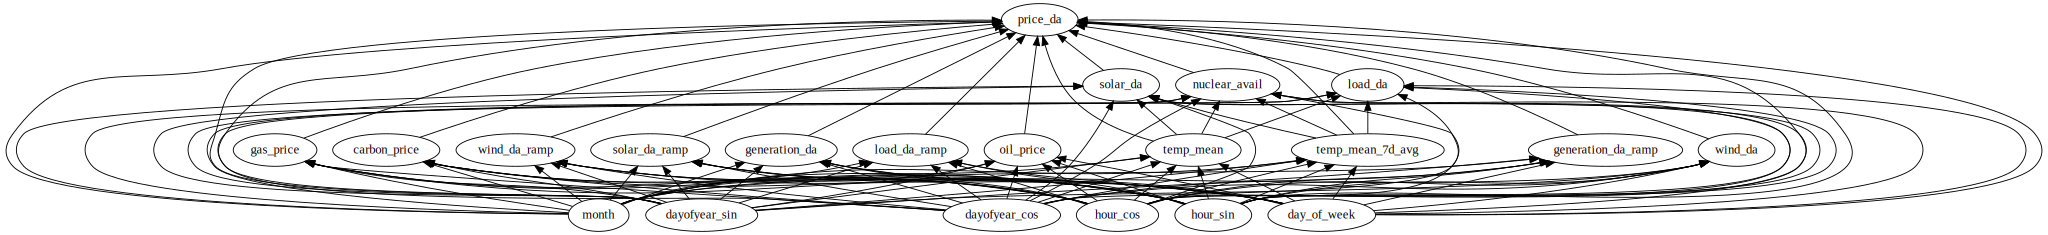

100%|██████████| 100/100 [3:34:32<00:00, 128.72s/it] 


16530.226808786392


bruteforce sampling: 100%|██████████| 500/500 [06:47<00:00,  1.23it/s]


finished shap-flow calculation for model #2


In [21]:
periods = [('2015-01-08', '2021-09-30'),
            ('2021-10-01', '2023-12-31'),
            ('2015-01-08', '2023-12-31')]
start_date, end_date = periods[0]
version = 'v5'
layer_sizes = [(30, 15),
               (30, 15),
               (10, 15)]

for i, (start_date, end_date) in enumerate(periods):
    model_name = 'pytorch_start_{}_end_{}'.format(start_date, end_date)
    l1, l2 = layer_sizes[i]
    X_train = read_csv_incl_timeindex('./data/{}/X_train_pytorch_start_{}_end_{}.csv'.format(version, start_date, end_date))
    X_test = read_csv_incl_timeindex('./data/{}/X_test_pytorch_start_{}_end_{}.csv'.format(version, start_date, end_date))
    y_train = read_csv_incl_timeindex('./data/{}/y_train_pytorch_start_{}_end_{}.csv'.format(version, start_date, end_date))
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    X_col = X_train.columns
    X_scaler = X_scaler.fit(X_train[X_col].values)

    y_col = y_train.columns
    y_scaler = y_scaler.fit(y_train[y_col].values)
    config = {
                "input_size": len(X_test.columns), # automatically set to number of features
                "l1_size": l1,
                "l2_size": l2,
                "output_size": 1,
                "learning_rate": 0.001,
                "do": 0
            }
    model = PriceFNN(config)
    model.load_state_dict(torch.load("./models/{}/pytorch/best/model_{}_l1_{}_l2_{}.pkl".format(version, model_name, l1, l2)))
    model.eval()

    seed = 7
    n_bg = 100 # number of sampled background samples (paper: 100)
    nsamples = 500 # number of forefround samples to explain (paper: 1,000)
    nruns = 500
    bg = X_test.sample(n=n_bg, random_state=seed) # background samples
    fg = X_test.sample(n=nsamples, random_state=seed) # foreground samples (samples to explain)

    bg.to_csv('./data/{}/bg_{}.csv'.format(version, model_name), sep=',', index=True)
    fg.to_csv('./data/{}/fg_{}.csv'.format(version, model_name), sep=',', index=True)

    causal_links = CausalLinks()
    categorical_feature_names = []
    display_translator = translator(X_test.columns, X_test, X_test)
    target_name = 'price_da'
    feature_names = list(X_test.columns)

    calendar_features = ['month', 'dayofyear_sin', 'dayofyear_cos', 'hour_sin', 'hour_cos', 'day_of_week']
    non_calendar_features = list(set(feature_names) - set(calendar_features))
    causal_links.add_causes_effects(calendar_features, non_calendar_features) 

    intermediate = ['temp_mean_7d_avg', 'temp_mean']
    upstream = ['load_da', 'nuclear_avail', 'solar_da']
    causal_links.add_causes_effects(intermediate, upstream)

    causal_links.add_causes_effects(feature_names, 
                                    target_name, 
                                    create_pytorch_lightning_f(X_scaler, y_scaler, model))

    causal_graph = build_feature_graph(X_test, 
                                    causal_links=causal_links, 
                                    categorical_feature_names=categorical_feature_names,
                                    display_translator=display_translator,
                                    target_name=target_name,
                                    method='xgboost')
    causal_graph.draw()

    #calculate multiple background result (same as in income.ipynb)
    #note: shapley flow is calculated on test set

    # change this to a suitable value, depending on machine (e.g. 6, 12; on cluster 20)
    num_processes = 10
    from shap_flow_util import calculate_edge_credit

    start = time.time()

    pool = mp.Pool(num_processes)
    _args = [(causal_graph, bg[i:i+1], fg, nruns, False) for i in range(len(bg))]
    edge_credits = pool.starmap(calculate_edge_credit, tqdm.tqdm(_args, total=len(_args)))
    pool.close()
    pool.join()

    end = time.time()
    print(end - start)

    # need this for being able to draw shapley flow (need to call shap_values for one bg sample redundandly)
    # (caused by using futures )
    explainer = GraphExplainer(causal_graph, bg[0:1], nruns, silent=False)
    cf = explainer.shap_values(fg) 

    # save credit flow to file
    cf.edge_credit = edge_credits2edge_credit(edge_credits, cf.graph)
    with open('./credit_flow/{}/{}.pkl'.format(version, model_name), 'wb') as file:
        dill.dump(cf, file)
    print("finished shap-flow calculation for model #{}".format(i))